# Question 2: Does distance from the city have an affect on House Price?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import scipy.stats as scs
import statsmodels.api as sm
from statsmodels.formula.api import ols

import folium
from folium.plugins import MarkerCluster # for clustering the markers

In [2]:
df = pd.read_csv('../data/datawithnewcols.csv',index_col = 0)

In [3]:
df.head()

id        date      price  bedrooms  bathrooms  sqft_living  \
0  6414100192  2014-12-09   538000.0         3       2.25         2570   
1  5631500400  2015-02-25   180000.0         2       1.00          770   
2  2487200875  2014-12-09   604000.0         4       3.00         1960   
3  1954400510  2015-02-18   510000.0         3       2.00         1680   
4  7237550310  2014-05-12  1230000.0         4       4.50         5420   

   sqft_lot  floors  waterfront  view  ...  sqft_lot15  Age_of_House  \
0      7242     2.0         0.0   0.0  ...        7639            69   
1     10000     1.0         0.0   0.0  ...        8062            87   
2      5000     1.0         0.0   0.0  ...        5000            55   
3      8080     1.0         0.0   0.0  ...        7503            33   
4    101930     1.0         0.0   0.0  ...      101930            19   

   Years_last_renovation  basement  biggerliving  biggerlot  \
0                     29         1             1          0   
1                     87         0             0          1   
2                     55         1             1          0   
3                     33         0             0          1   
4                     19         1             1          0   

   distance_from_seattle  distance_from_bellevue  distance_from_a_city  \
0              12.613856               15.150174             12.613856   
1              16.333282               14.375822             14.375822   
2              10.617501               17.522706             10.617501   
3              21.759524               11.683886             11.683886   
4              25.295727               15.508940             15.508940   

   distance_from_airport  
0              30.859494  
1              33.112379  
2              10.988905  
3              27.230991  
4              32.449837  

[5 rows x 30 columns]

In [4]:
def remove_outliers(df, col, threshold = 3):
    zscores = scs.zscore(df[col])
    indices = np.abs(np.where(zscores > threshold))
    return indices[0]

check_col = ['price','distance_from_a_city']

all_indices = []
for col in check_col:
    indices = remove_outliers(df, col, threshold = 3)
    all_indices.extend(indices)
all_indices = np.unique(all_indices)

In [5]:
df.drop(all_indices, axis=0,inplace = True)

In [6]:
df.reset_index(drop=True,inplace = True)

# Looking at different visualisation for price vs distance from city

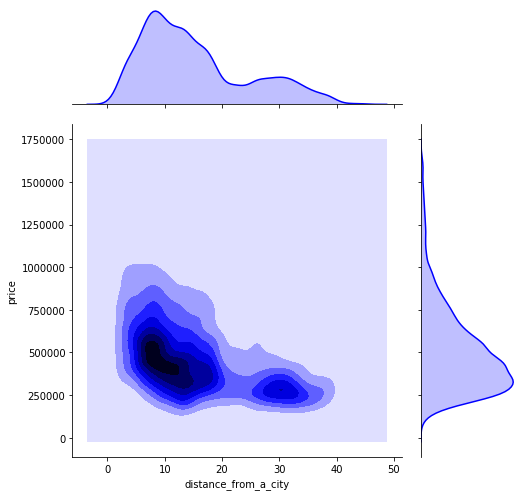

In [8]:
sns.jointplot(x='distance_from_a_city',y='price',data=df, kind = 'kde', height = 7, 
              color = 'b', ratio = 3)


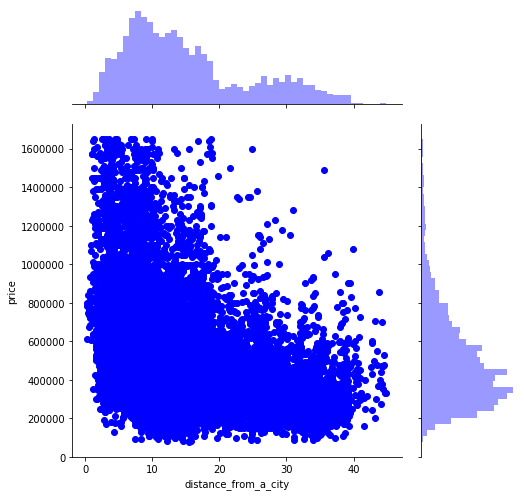

In [9]:
sns.jointplot(x='distance_from_a_city',y='price',data=df, kind = 'scatter', height = 7, 
              color = 'b', ratio = 3)


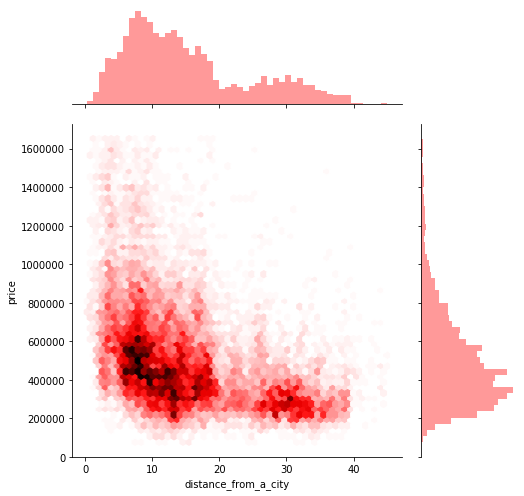

In [10]:
sns.jointplot(x='distance_from_a_city',y='price',data=df, kind = 'hex', height = 7, 
              color = 'r', ratio = 3)


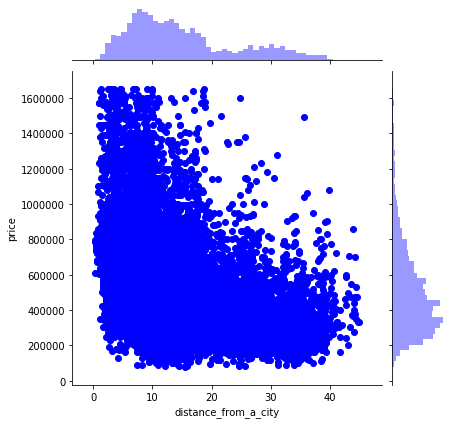

In [11]:
sns.jointplot(x='distance_from_a_city',y='price',data=df, color='b').plot_joint(sns.kdeplot, zorder=0, n_levels=6)

**Here it is clear that houses above 1milllion are located withing 20km of the City**

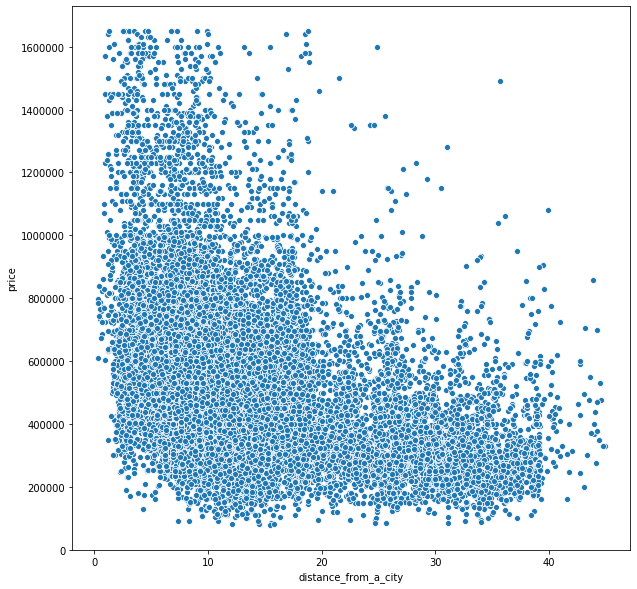

In [12]:
fig, axes=plt.subplots(nrows=1, ncols=1, figsize=(10,10))
ax = sns.scatterplot(y='price',x='distance_from_a_city',data=df)

In [13]:
mp = folium.Map(location=[47.610378, -122.200676], default_zoom_start=12.5)

# add a marker for every record in the filtered data, use a clustered view
marker_cluster = MarkerCluster().add_to(mp) # create marker clusters
for i in range(df.shape[0]):
    location = [df['lat'][i],df['long'][i]]
    tooltip = f"House ID: {df['id'][i]}"

    folium.Marker(location=location,tooltip=tooltip).add_to(marker_cluster)

folium.Circle([47.610378, -122.200676],
                    radius=15000
                   ).add_to(mp)

mp.save(outfile = '../maps/my_map_radius.html')

In [14]:
from IPython.display import Image


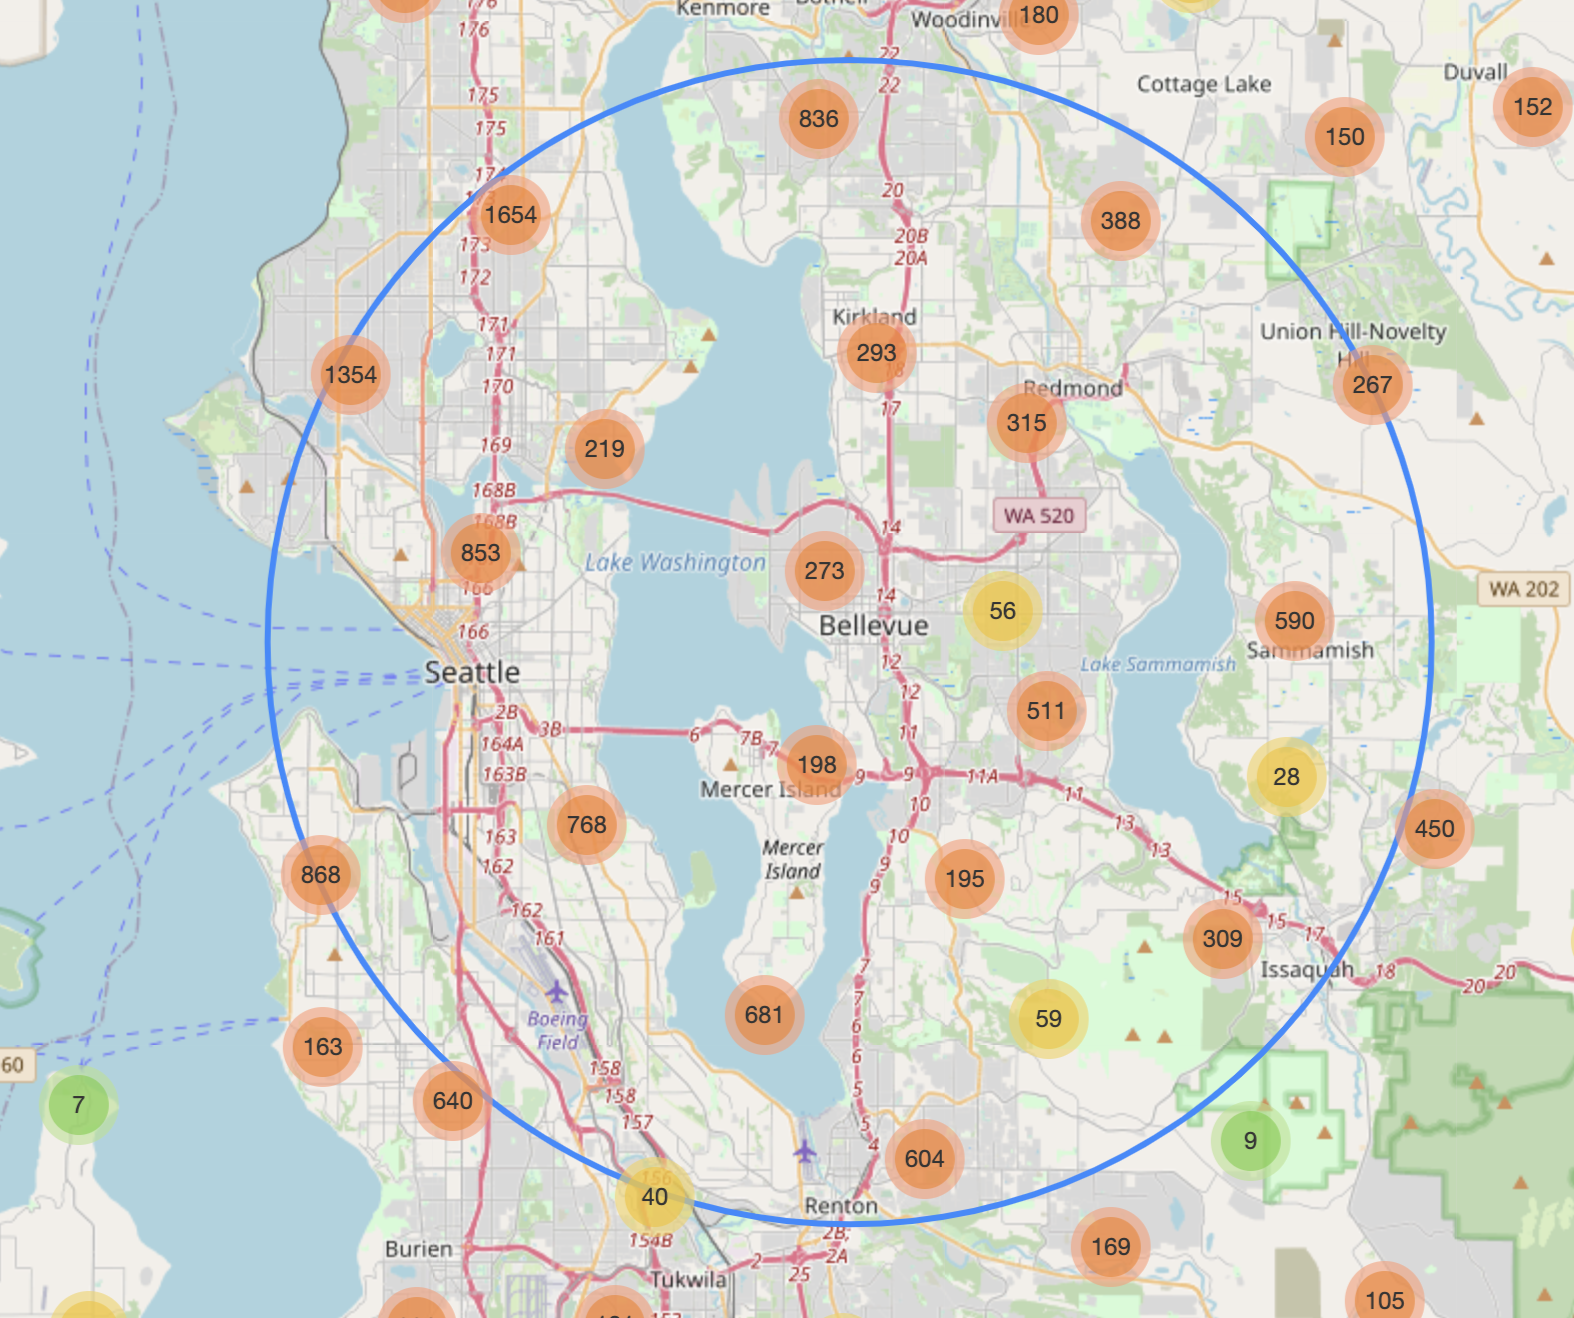

In [15]:
Image(filename = '../Images/mapwithradius.png', width=1000, height=1000)

# Perform a Single Variable Regression using distance from a city 

In [16]:
X1 = df['distance_from_a_city']
y1 = df['price']


In [17]:
X1 = sm.add_constant(X1)

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [18]:
model = sm.OLS(y1,X1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     4392.
Date:                Thu, 04 Jun 2020   Prob (F-statistic):               0.00
Time:                        22:00:04   Log-Likelihood:            -2.5773e+05
No. Observations:               18690   AIC:                         5.155e+05
Df Residuals:                   18688   BIC:                         5.155e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  6.97e+05   3299.989    211.211      0.000    6.91e+05    7.03e+05
distance_from_a_city -1.226e+04    185.061    -66.271      0.000   -1.26e+04   -1.19e+04
==============================================================================
Omnibus:                     4602.137   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11398.315
Skew:                           1.357   Prob(JB):                         0.00
Kurtosis:                       5.697   Cond. No.                         34.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
model.params

const                   696992.828512
distance_from_a_city    -12264.145975
dtype: float64

# Conclusion

* An increase in 1km from the city results in a deacrese in price by  USD 12,264

* It is clear that houses above 1milllion are located withing 20km of the City

* It is clear that the distance of the house from a city affects the house price